In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
df_s = pd.read_excel('SaleData.xlsx')
df_i = pd.read_csv('imdb.csv',escapechar = "\\")
df_m = pd.read_csv('movie_metadata.csv',escapechar = "\\")
df_d = pd.read_csv('diamonds.csv')

In [3]:
df_i.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [13]:
def movies(df):
	title = []
	title.append(df[df['duration'] == df['duration'].max()]['title'].values)
	title.append(df[df['duration'] == df['duration'].min()]['title'].values)
	return title

In [14]:
movies(df_i)

[array(['Baseball The National Pastime (TV Episode 1994)'], dtype=object),
 array(['Traffic Crossing Leeds Bridge (1888)'], dtype=object)]

In [12]:
# Q1 Find least sales amount for each item
# has been solved as an example
def least_sales(df):
	ls = df.groupby(["Item"])["Sale_amt"].min().reset_index()
	return ls

# Q2 compute total sales at each year X region
def sales_year_region(df):
	df['year'] = df['OrderDate'].dt.year
	syr = df.groupby(['year','Region'])['Sale_amt'].sum().reset_index()
	return syr

# Q3 append column with no of days difference from present date to each order date
from datetime import date
def days_diff(df):
	df['days_diff'] = pd.to_datetime(date.today()) - df['OrderDate']
	return df

# Q4 get dataframe with manager as first column and  salesman under them as lists in rows in second column.
def mgr_slsmn(df):
	ms = df.groupby('Manager')['SalesMan'].apply(lambda x: ','.join(set(x.dropna()))).rename('list_of_salesman').reset_index()
	return ms

# Q5 For all regions find number of salesman and number of units
def slsmn_units(df):
	df1 = df.groupby(['Region'])['SalesMan'].count().rename('salesmen_count')
	df2 = df.groupby(['Region'])['Sale_amt'].sum().rename('total_sales')
	ls = pd.concat([df1,df2],axis=1)
	return ls

# Q6 Find total sales as percentage for each manager
def sales_pct(df):
	total_sales = df.groupby(['Manager'])['Sale_amt'].sum().rename('total_sales')
	sum1 = total_sales.sum()
	ps = total_sales.apply(lambda x: x/sum1).rename('percent_sales').reset_index()
	return ps

# Q7 get imdb rating for fifth movie of dataframe
def fifth_movie(df):
	ls = df.loc[4,'imdbRating']
	return ls

# Q8 return titles of movies with shortest and longest run time
def movies(df):
	title = []
	title.append(df[df['duration'] == df['duration'].max()]['title'].values)
	title.append(df[df['duration'] == df['duration'].min()]['title'].values)
	return title

# Q9 sort by two columns - release_date (earliest) and Imdb rating(highest to lowest)
def sort_df(df):
	ls = df.sort_values(['year', 'imdbRating'], ascending=[True, False])
	return ls

# Q10 subset revenue more than 2 million and spent less than 1 million & duration between 30 mintues to 180 minutes
def subset_df(df):
	ls = df[(df['revenue'] > 2000000) & (df['spent'] < 1000000) & (df['duration'] >= 30*60) & (df['duration'] <= 180*60)]
	return ls

# Q11 count the duplicate rows of diamonds DataFrame.
def dupl_rows(df):
	ls = df.duplicated().sum()
	return ls

# Q12 droping those rows where any value in a row is missing in carat and cut columns
def drop_row(df):
	ls = df.dropna(subset=['carat','cut'],how='any')
	return ls

# Q13 subset only numeric columns
def sub_numeric(df):
	ls = df.select_dtypes(include=np.number)
	return ls

# Q14 compute volume as (x*y*z) when depth > 60 else 8
def f(row):
    if row['depth'] > 60:
        return float(row['x']) * float(row['y']) * float(row['z'])
    else:
        return 8
def volume(df):
	df['volume'] = df.apply(f,axis=1)
	return df['volume']

# Q15 impute missing price values with mean
def impute(df):
	#df['price'].fillna(value=df['price'].mean(),inplace = True) //for change in dataframe
	ls = df['price'].fillna(value=df['price'].mean())
	return ls

#print(least_sales(df_s))
#print(sales_year_region(df_s))
#print(days_diff(df_s))
#print(mgr_slsmn(df_s))
#print(slsmn_units(df_s))
#print(sales_pct(df_s))
#print(fifth_movie(df_i))
#print(movies(df_i))
#print(sort_df(df_i))
#print(subset_df(df_i))
#print(dupl_rows(df_d))
#print(drop_row(df_d))
#print(sub_numeric(df_d))
#print(volume(df_d))
#print(impute(df_d))

In [16]:
least_sales(df_s)

,Item,Sale_amt
0,Cell Phone,3375.0
1,Desk,250.0
2,Home Theater,2000.0
3,Television,8386.0
4,Video Games,936.0


In [17]:
sales_year_region(df_s)

,year,Region,Sale_amt
0,2018,Central,479825.0
1,2018,East,293780.0
2,2018,West,105424.0
3,2019,Central,349944.5
4,2019,East,27227.0
5,2019,West,49475.0


In [18]:
days_diff(df_s)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,year,days_diff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,2018,732 days
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,2018,715 days
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,2018,698 days
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,2018,681 days
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,2018,664 days
5,2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0,2018,647 days
6,2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0,2018,630 days
7,2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0,2018,613 days
8,2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0,2018,596 days
9,2018-06-08,East,Martha,Alexander,Home Theater,60,500.0,30000.0,2018,579 days


In [19]:
mgr_slsmn(df_s)

,Manager,list_of_salesman
0,Douglas,"John,Michael,Karen"
1,Hermann,"Shelli,Luis,Sigal"
2,Martha,"Diana,Steven,Alexander"
3,Timothy,"David,Stephen"


In [27]:
df_s.groupby('Manager')['SalesMan'].max().reset_index()

,Manager,SalesMan
0,Douglas,Michael
1,Hermann,Sigal
2,Martha,Steven
3,Timothy,Stephen


In [28]:
slsmn_units(df_s)

,salesmen_count,total_sales
Region,,
Central,24,829769.5
East,13,321007.0
West,6,154899.0


In [29]:
sales_pct(df_s)

,Manager,percent_sales
0,Douglas,0.183090
1,Hermann,0.279632
2,Martha,0.361876
3,Timothy,0.175402


In [34]:
fifth_movie(df_i)

8.7

In [35]:
movies(df_i)

[array(['Baseball The National Pastime (TV Episode 1994)'], dtype=object),
 array(['Traffic Crossing Leeds Bridge (1888)'], dtype=object)]

In [38]:
sort_df(df_i).head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
14013,titles04/index.html.8647,tt0392728,Roundhay Garden Scene (1888),roundhay garden scene,http://www.imdb.com/title/tt0392728/,7.8,2931.0,NaN,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
13682,titles04/index.html.8070,tt0343112,Traffic Crossing Leeds Bridge (1888),traffic crossing leeds bridge,http://www.imdb.com/title/tt0343112/,7.2,1442.0,2.0,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
14125,titles04/index.html.8877,tt0416046,"Monkeyshines, No. 2 (1890)",monkeyshines no,http://www.imdb.com/title/tt0416046/,5.4,383.0,NaN,1890.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6909,titles04/index.html,tt0000005,Blacksmith Scene (1893),blacksmith scene,http://www.imdb.com/title/tt0000005/,6.3,1039.0,60.0,1893.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
12691,titles04/index.html.6501,tt0177707,Dickson Experimental Sound Film (1894),dickson experimental sound film,http://www.imdb.com/title/tt0177707/,6.8,965.0,22.0,1894.0,video.movie,...,0,0,0,0,1,0,0,0,0,0


In [39]:
dupl_rows(df_d)

149

In [40]:
len(drop_row(df_d))

53941

In [42]:
drop_row(df_d).count()

carat      53941
cut        53941
color      53941
clarity    53941
depth      53941
table      53941
price      53937
x          53941
y          53941
z          53938
dtype: int64

In [43]:
sub_numeric(df_d)

,depth,table,price,x,y
0,61.5,55.0,326.0,3.95,3.98
1,59.8,61.0,326.0,3.89,3.84
2,56.9,65.0,327.0,4.05,4.07
3,62.4,58.0,334.0,4.20,4.23
4,63.3,58.0,335.0,4.34,4.35
5,62.8,57.0,NaN,3.94,3.96
6,62.3,57.0,336.0,3.95,3.98
7,61.9,55.0,337.0,4.07,4.11
8,65.1,61.0,337.0,3.87,3.78
9,59.4,61.0,338.0,4.00,4.05


In [47]:
volume(df_d)

ValueError: ("could not convert string to float: 'None'", 'occurred at index 21')

In [49]:
df_d.fillna(df_d.mean())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.000000,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.000000,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.000000,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.000000,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.000000,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3932.858525,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.000000,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.000000,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.000000,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.000000,4.00,4.05,2.39


In [48]:
volume(df_d)

ValueError: ("could not convert string to float: 'None'", 'occurred at index 21')

In [55]:
df_d.fillna(df_d.mean())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.000000,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.000000,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.000000,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.000000,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.000000,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3932.858525,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.000000,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.000000,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.000000,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.000000,4.00,4.05,2.39


In [56]:
df_d.apply(lambda x: x.fillna(x.mean()),axis=0)

TypeError: ('can only concatenate str (not "int") to str', 'occurred at index carat')

In [57]:
impute(df_d)

0         326.000000
1         326.000000
2         327.000000
3         334.000000
4         335.000000
5        3932.858525
6         336.000000
7         337.000000
8         337.000000
9         338.000000
10        335.000000
11        339.000000
12        340.000000
13        342.000000
14        344.000000
15        345.000000
16        345.000000
17        348.000000
18        351.000000
19        351.000000
20        351.000000
21        351.000000
22        352.000000
23        353.000000
24        353.000000
25        351.000000
26        353.000000
27        354.000000
28        355.000000
29        357.000000
            ...     
53913    2753.000000
53914    2753.000000
53915    2753.000000
53916    2753.000000
53917    2753.000000
53918    2753.000000
53919    2753.000000
53920    2753.000000
53921    2753.000000
53922    2755.000000
53923    2755.000000
53924    2755.000000
53925    2756.000000
53926    2756.000000
53927    2756.000000
53928    2756.000000
53929    2756

In [60]:
impute(df_d).isna().sum()

0

In [61]:
df_d['price'].isna().sum()

4

In [62]:
df_i.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [63]:
df_i.corr()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
imdbRating,1.000000,0.155587,0.002109,-0.107825,0.196628,0.133735,0.077739,0.077474,0.079264,-0.000752,...,-0.044206,-0.038899,0.000553,-0.101233,-0.016555,-0.008002,-0.012001,-0.074889,0.073230,-0.003749
ratingCount,0.155587,1.000000,0.179667,0.164184,0.410469,0.323682,0.349084,0.527880,0.831163,0.132437,...,-0.025000,-0.030650,-0.007889,0.089667,-0.072680,0.002619,-0.043506,0.137124,-0.022521,-0.035393
duration,0.002109,0.179667,1.000000,-0.076425,0.126796,0.039913,0.041645,0.052611,0.223513,0.173650,...,-0.041387,-0.084107,0.143639,-0.001983,-0.311864,0.062029,-0.109212,0.100035,0.091947,0.046722
year,-0.107825,0.164184,-0.076425,1.000000,0.074972,0.082769,0.097278,0.127292,0.107724,-0.052972,...,0.068777,0.066892,-0.132150,0.008967,-0.043119,0.017439,0.140067,0.036430,-0.132970,-0.164510
nrOfWins,0.196628,0.410469,0.126796,0.074972,1.000000,0.805972,0.276317,0.361222,0.379612,0.051590,...,-0.018613,-0.015304,0.050285,-0.028858,-0.057007,-0.005342,-0.050309,0.014853,0.025744,-0.028816
nrOfNominations,0.133735,0.323682,0.039913,0.082769,0.805972,1.000000,0.379179,0.421654,0.300093,0.044488,...,-0.009698,-0.003309,0.027224,-0.009299,-0.054244,-0.007204,-0.030491,0.004341,-0.007161,-0.027060
nrOfPhotos,0.077739,0.349084,0.041645,0.097278,0.276317,0.379179,1.000000,0.580414,0.314884,0.110914,...,-0.034779,0.079199,0.022605,0.035711,-0.067615,0.004794,-0.064707,0.036797,-0.017274,-0.016770
nrOfNewsArticles,0.077474,0.527880,0.052611,0.127292,0.361222,0.421654,0.580414,1.000000,0.423742,0.085858,...,-0.014688,0.048266,-0.010807,0.067120,-0.045949,-0.004928,-0.027123,0.049573,-0.025943,-0.022273
nrOfUserReviews,0.079264,0.831163,0.223513,0.107724,0.379612,0.300093,0.314884,0.423742,1.000000,0.163536,...,-0.046484,-0.037725,0.012851,0.123791,-0.083478,0.000189,-0.085135,0.165610,-0.008322,-0.025478
nrOfGenre,-0.000752,0.132437,0.173650,-0.052972,0.051590,0.044488,0.110914,0.085858,0.163536,1.000000,...,-0.033282,-0.048233,0.192786,0.123769,0.003280,0.053305,-0.045912,0.160146,0.097801,-0.039957


In [64]:
df = df_i

In [65]:
df['duration'].corr(df['imdbRating'])

0.0021087098896423644

In [66]:
volume(df_d)

ValueError: ("could not convert string to float: 'None'", 'occurred at index 21')

In [68]:
df_d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [112]:
def vol(df):
    vol = []
    for i in range(len(df)):
        if(df['depth'][i] > 60):
            if(df['z'][i] == 'None'):
                vol.append(np.nan)
            else:
                vol.append(float(df['x'][i])*float(df['y'][i])*float(df['z'][i]))
        else:
            vol.append(8)
    df['volume'] = vol
    return df

In [113]:
vol(df_d)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.000000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.000000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.5,115.920000
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120


In [79]:
df_i.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [8]:
df_d.head()
df = df_d

In [10]:
pd.qcut(df['volume'],5)

0         (-0.001, 51.213]
1         (-0.001, 51.213]
2         (-0.001, 51.213]
3         (-0.001, 51.213]
4         (51.213, 73.583]
5         (-0.001, 51.213]
6         (-0.001, 51.213]
7         (-0.001, 51.213]
8         (-0.001, 51.213]
9         (-0.001, 51.213]
10        (51.213, 73.583]
11        (-0.001, 51.213]
12        (-0.001, 51.213]
13        (-0.001, 51.213]
14        (51.213, 73.583]
15        (-0.001, 51.213]
16        (51.213, 73.583]
17        (-0.001, 51.213]
18        (-0.001, 51.213]
19                     NaN
20        (-0.001, 51.213]
21                     NaN
22        (-0.001, 51.213]
23        (-0.001, 51.213]
24        (-0.001, 51.213]
25        (-0.001, 51.213]
26        (-0.001, 51.213]
27        (-0.001, 51.213]
28        (-0.001, 51.213]
29        (-0.001, 51.213]
               ...        
53913     (-0.001, 51.213]
53914    (73.583, 119.218]
53915    (119.218, 176.07]
53916    (119.218, 176.07]
53917    (119.218, 176.07]
53918    (73.583, 119.218]
5

In [11]:
df_i.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [12]:
df_i['type'].head()

0    video.movie
1    video.movie
2    video.movie
3    video.movie
4    video.movie
Name: type, dtype: object

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725


In [19]:
sns.set_style('whitegrid')

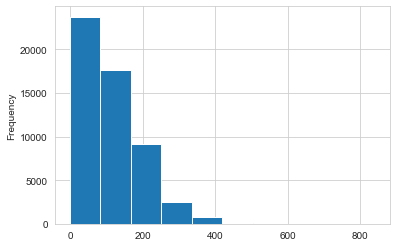

In [20]:
df['volume'].plot(kind = 'hist')

In [21]:
pd.qcut(df['volume'])

TypeError: qcut() missing 1 required positional argument: 'q'

In [22]:
df['volume'].describe()

count    53938.000000
mean       115.507055
std         80.702385
min          0.000000
25%         53.771130
50%         92.862208
75%        165.107264
max        838.502400
Name: volume, dtype: float64

In [24]:
df = df_i
df.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df.groupby(['type','year'])['imdbRating'].min().reset_index()

,type,year,imdbRating
0,game,1972.0,7.8
1,game,1980.0,6.1
2,game,1981.0,7.6
3,game,1982.0,6.9
4,game,1985.0,6.5
5,game,1987.0,6.6
6,game,1988.0,6.7
7,game,1989.0,2.1
8,game,1990.0,3.9
9,game,1991.0,8.2


In [33]:
col = df.columns.values

In [36]:
from sklearn.datasets import load_boston

In [41]:
boston = load_boston()
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

In [42]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [47]:
df = df_i

In [53]:
df.iloc[1,]

fn                                    titles01/tt0015864
tid                                            tt0015864
title                                  Goldrausch (1925)
wordsInTitle                                  goldrausch
url                 http://www.imdb.com/title/tt0015864/
imdbRating                                           8.3
ratingCount                                        45319
duration                                            5700
year                                                1925
type                                         video.movie
nrOfWins                                               2
nrOfNominations                                        1
nrOfPhotos                                            35
nrOfNewsArticles                                     110
nrOfUserReviews                                      122
nrOfGenre                                              3
Action                                                 0
Adult                          

In [59]:
df = df_m

In [111]:
# Q1 Find least sales amount for each item
# has been solved as an example
def least_sales(df):
	ls = df.groupby(["Item"])["Sale_amt"].min().reset_index()
	return ls

# Q2 compute total sales at each year X region
def sales_year_region(df):
	df['year'] = df['OrderDate'].dt.year
	syr = df.groupby(['year','Region'])['Sale_amt'].sum().reset_index()
	return syr

# Q3 append column with no of days difference from present date to each order date
from datetime import date
def days_diff(df):
	df['days_diff'] = pd.to_datetime(date.today()) - df['OrderDate']
	return df

# Q4 get dataframe with manager as first column and  salesman under them as lists in rows in second column.
def mgr_slsmn(df):
	ms = df.groupby('Manager')['SalesMan'].apply(lambda x: ','.join(set(x.dropna()))).rename('list_of_salesman').reset_index()
	return ms

# Q5 For all regions find number of salesman and number of units
def slsmn_units(df):
	df1 = df.groupby(['Region'])['SalesMan'].count().rename('salesmen_count')
	df2 = df.groupby(['Region'])['Sale_amt'].sum().rename('total_sales')
	ls = pd.concat([df1,df2],axis=1)
	return ls

# Q6 Find total sales as percentage for each manager
def sales_pct(df):
	total_sales = df.groupby(['Manager'])['Sale_amt'].sum().rename('total_sales')
	sum1 = total_sales.sum()
	ps = total_sales.apply(lambda x: x/sum1).rename('percent_sales').reset_index()
	return ps

# Q7 get imdb rating for fifth movie of dataframe
def fifth_movie(df):
	ls = df.loc[4,'imdbRating']
	return ls

# Q8 return titles of movies with shortest and longest run time
def movies(df):
	title = []
	title.append(df[df['duration'] == df['duration'].max()]['movie_title'].values)
	title.append(df[df['duration'] == df['duration'].min()]['movie_title'].values)
	return title

# Q9 sort by two columns - release_date (earliest) and Imdb rating(highest to lowest)
def sort_df(df):
	ls = df.sort_values(['year', 'imdbRating'], ascending=[True, False])
	return ls

# Q10 subset revenue more than 2 million and spent less than 1 million & duration between 30 mintues to 180 minutes
def subset_df(df):
	ls = df[(df['gross'] > 2000000) & (df['budget'] < 1000000) & (df['duration'] >= 30) & (df['duration'] <= 180)]
	return ls

# Q11 count the duplicate rows of diamonds DataFrame.
def dupl_rows(df):
	ls = df.duplicated().sum()
	return ls

# Q12 droping those rows where any value in a row is missing in carat and cut columns
def drop_row(df):
	ls = df.dropna(subset=['carat','cut'],how='any')
	return ls

# Q13 subset only numeric columns
def sub_numeric(df):
	ls = df.select_dtypes(include=np.number)
	return ls

# Q14 compute volume as (x*y*z) when depth > 60 else 8
def f(row):
    if row['depth'] > 60:
        return float(row['x']) * float(row['y']) * float(row['z'])
    else:
        return 8
def volume(df):
	df['volume'] = df.apply(f,axis=1)
	return df['volume']

# Q15 impute missing price values with mean
def impute(df):
	#df['price'].fillna(value=df['price'].mean(),inplace = True) //for change in dataframe
	ls = df['price'].fillna(value=df['price'].mean())
	return ls

#print(least_sales(df_s))
#print(sales_year_region(df_s))
#print(days_diff(df_s))
#print(mgr_slsmn(df_s))
#print(slsmn_units(df_s))
#print(sales_pct(df_s))
#print(fifth_movie(df_i))
#print(movies(df_i))
#print(sort_df(df_i))
#print(subset_df(df_i))
#print(dupl_rows(df_d))
#print(drop_row(df_d))
#print(sub_numeric(df_d))
#print(volume(df_d))
#print(impute(df_d))

In [8]:
df = df_i
df.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [66]:
movies(df)

[array(['Trapped\xa0            '], dtype=object),
 array(['Shaun the Sheep\xa0            ', 'The Touch\xa0'], dtype=object)]

In [69]:
subset_df(df)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,826.0,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0
3821,Color,Billy Bob Thornton,104.0,148.0,0.0,263.0,Dwight Yoakam,3000.0,24475416.0,Drama,...,309.0,English,USA,R,890000.0,1996.0,324.0,8.0,1.85,0
4458,Color,Guy Ritchie,116.0,120.0,0.0,452.0,Jason Flemyng,26000.0,3650677.0,Comedy|Crime,...,523.0,English,UK,R,960000.0,1998.0,1000.0,8.2,1.85,21000
4478,Color,Youssef Delara,16.0,80.0,8.0,183.0,Jenni Rivera,2000.0,2833383.0,Drama|Music,...,11.0,English,USA,R,427000.0,2012.0,245.0,5.7,2.35,0
4530,Color,John G. Avildsen,141.0,145.0,80.0,794.0,Burgess Meredith,13000.0,117235247.0,Drama|Sport,...,542.0,English,USA,PG,960000.0,1976.0,1000.0,8.1,1.33,0
4546,Color,Russ Meyer,101.0,109.0,199.0,44.0,Cynthia Myers,503.0,9000000.0,Comedy|Drama|Music,...,137.0,English,USA,X,900000.0,1970.0,46.0,6.2,2.35,0
4638,Black and White,Elia Kazan,134.0,108.0,603.0,279.0,Karl Malden,10000.0,9600000.0,Crime|Drama|Romance,...,281.0,English,USA,Not Rated,910000.0,1954.0,416.0,8.2,1.85,0


In [71]:
df.iloc[1]

color                                                                    Color
director_name                                                   Gore Verbinski
num_critic_for_reviews                                                     302
duration                                                                   169
director_facebook_likes                                                    563
actor_3_facebook_likes                                                    1000
actor_2_name                                                     Orlando Bloom
actor_1_facebook_likes                                                   40000
gross                                                              3.09404e+08
genres                                                Action|Adventure|Fantasy
actor_1_name                                                       Johnny Depp
movie_title                          Pirates of the Caribbean: At World's End 
num_voted_users                                     

In [72]:
df.groupby(['type','year'])['genres'].min().reset_index()

KeyError: 'type'

In [34]:
df = df_d

In [35]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725


In [36]:
len(df)

53943

In [39]:
bins = pd.qcut(df['volume'],4).value_counts()

In [40]:
bins

(-0.001, 53.771]      13486
(92.862, 165.107]     13485
(165.107, 838.502]    13484
(53.771, 92.862]      13483
Name: volume, dtype: int64

In [89]:
df = df_i

In [90]:
df['Genre_combo'] = df[df.columns[16:]].T.apply(lambda x : "|".join(x.index[x==1]),axis=0)

In [91]:
df.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Genre_combo
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,NaN,NaN,NaN,NaN,Comedy|Drama|Family
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,NaN,NaN,NaN,NaN,Adventure|Comedy|Family
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,0,0,NaN,NaN,NaN,NaN,Drama|SciFi
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,NaN,NaN,NaN,NaN,Action|Adventure|Comedy
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,0,0,0,NaN,NaN,NaN,NaN,Comedy|Drama|Romance


In [92]:
df=df.groupby(["type","year","Genre_combo"]).agg(avg_rating = ("imdbRating","mean"),
                                                  min_rating = ("imdbRating","min"),
                                                  max_rating = ("imdbRating","max"),
                                                  total_run_time_mins = ("duration",np.sum))

In [93]:
df

avg_rating  min_rating  max_rating  \
type     year   Genre_combo                                                    
game     1987.0                                 6.80         6.8         6.8   
                Action|Adventure                6.60         6.6         6.6   
                Action|Adventure|Fantasy        7.30         7.3         7.3   
         1988.0                                  NaN         NaN         NaN   
         1989.0 Action                          8.20         8.2         8.2   
...                                              ...         ...         ...   
video.tv 2013.0 Comedy                          8.00         8.0         8.0   
                Documentary|TalkShow            8.30         8.3         8.3   
                TalkShow                         NaN         NaN         NaN   
         2014.0                                 7.25         6.7         7.8   
                RealityTV                       7.20         7.2         7.2   

                                          total_run_time_mins  
type     year   Genre_combo                                    
game     1987.0                                           0.0  
                Action|Adventure                          0.0  
                Action|Adventure|Fantasy                  0.0  
         1988.0                                           0.0  
         1989.0 Action                                    0.0  
...                                                       ...  
video.tv 2013.0 Comedy                                 3600.0  
                Documentary|TalkShow                    600.0  
                TalkShow                                  0.0  
         2014.0                                       12840.0  
                RealityTV                                 0.0  

[4689 rows x 4 columns]

In [95]:
df = df_i
df['length'] = df['title'].str.len()

In [96]:
df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Genre_combo,length
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,Comedy|Drama|Family,32
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,Adventure|Comedy|Family,17
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,Drama|SciFi,17
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,Action|Adventure|Comedy,18
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,Comedy|Drama|Romance,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7952,titles04/index.html.9989,tt0672488,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,http://www.imdb.com/title/tt0672488/,7.7,135.0,1440.0,2005.0,video.episode,...,0,0,0,0,NaN,NaN,NaN,NaN,Comedy,38
7953,titles04/index.html.9992,tt0675644,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,http://www.imdb.com/title/tt0675644/,7.3,8.0,5400.0,1957.0,video.episode,...,0,0,0,0,NaN,NaN,NaN,NaN,Comedy|Crime|Drama,49
7954,titles04/index.html.9994,tt0679222,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,http://www.imdb.com/title/tt0679222/,7.0,20.0,3600.0,1996.0,video.episode,...,1,0,0,0,NaN,NaN,NaN,NaN,TalkShow,68
7955,titles04/index.html.9995,tt0680064,Providence All the King's Men (TV Episode 2002),providence all the king s men tv episode,http://www.imdb.com/title/tt0680064/,NaN,NaN,3600.0,2002.0,video.episode,...,0,0,0,0,NaN,NaN,NaN,NaN,Drama,47


In [97]:
df['length'].corr(df['imdbRating'])

-0.0025597654989158226

In [98]:
df['Quantile']=pd.qcut(df['length'], 4, labels=False)

In [106]:
df2 = pd.crosstab(df.year,df.Quantile).rename(columns={0:" num_videos_less_than25Percentile",1:" num_videos_25_50Percentile",2:"num_videos_50_75Percentile",3:"num_videos_greaterthan75Precentile"})

In [107]:
df2['min_length'] = df.groupby(["year"])["length"].min()
df2['max_length'] = df.groupby(["year"])["length"].max()

In [108]:
df2

Quantile,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile,min_length,max_length
year,,,,,,
1893.0,0,1,0,0,23,23
1899.0,0,1,0,0,29,29
1903.0,0,1,0,0,30,30
1911.0,0,2,0,0,22,28
1913.0,0,2,0,1,25,44
...,...,...,...,...,...,...
2012.0,58,37,47,111,10,107
2013.0,68,34,54,117,9,97
2014.0,8,9,6,38,11,106


In [132]:
df = df_d

In [133]:
def vol(df):
    vol = []
    for i in range(len(df)):
        if(df['depth'][i] > 60):
            if(df['z'][i] == 'None'):
                vol.append(np.nan)
            else:
                vol.append(float(df['x'][i])*float(df['y'][i])*float(df['z'][i]))
        else:
            vol.append(8)
    df['volume'] = vol
    return df
vol(df_d)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,bins
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030,"(-0.001, 53.771]"
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.000000,"(-0.001, 53.771]"
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.000000,"(-0.001, 53.771]"
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580,"(-0.001, 53.771]"
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250,"(-0.001, 53.771]"
...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.5,115.920000,"(92.862, 165.107]"
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175,"(92.862, 165.107]"
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728,"(92.862, 165.107]"
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120,"(92.862, 165.107]"


In [134]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,bins
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203,"(-0.001, 53.771]"
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000,"(-0.001, 53.771]"
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000,"(-0.001, 53.771]"
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458,"(-0.001, 53.771]"
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725,"(-0.001, 53.771]"


In [136]:
df['bins'] = pd.qcut(df['volume'],4)

In [138]:
df2 = pd.crosstab(df.bins,df.cut).apply(lambda r: r/r.sum(), axis=1)

In [139]:
df2

cut,Fair,Good,Ideal,Premium,Very Good
bins,,,,,
"(-0.001, 53.771]",0.021357,0.108268,0.329106,0.290100,0.251168
"(53.771, 92.862]",0.011496,0.065787,0.546243,0.203664,0.172810
"(92.862, 165.107]",0.056062,0.125028,0.333259,0.216685,0.268966
"(165.107, 838.502]",0.030481,0.064669,0.389499,0.312296,0.203055


In [140]:
df_m.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [44]:
df = df_i

In [143]:
df.groupby(['year'])['imdbRating'].mean()

year
1893.0    6.300000
1899.0    5.900000
1903.0    7.400000
1911.0    6.600000
1913.0    6.700000
            ...   
2012.0    7.151613
2013.0    7.141711
2014.0    7.621212
2015.0         NaN
2017.0         NaN
Name: imdbRating, Length: 108, dtype: float64

In [45]:
df['bins'] = pd.qcut(df['duration'],10,labels=False)

In [46]:
df2 = df.groupby(['bins']).agg(total_nominations = ("nrOfNominations","sum"),
                               total_wins = ("nrOfWins","sum"))
df2['total_count'] = df.groupby(['bins'])['year'].count()

In [47]:
df2

,total_nominations,total_wins,total_count
bins,,,
0.0,2162,979,1090
1.0,5635,2204,670
2.0,615,555,487
3.0,2067,1819,816
4.0,2511,1983,760
5.0,3262,2719,691
6.0,3995,2995,760
7.0,5374,4611,792
8.0,6661,5279,683


In [4]:
df = df_m

In [5]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [23]:
df = df_i

In [24]:
df['length'] = df['title'].str.len()

In [25]:
df['Quantile']=pd.qcut(df['length'],q=[0, .25, .5, .75,1], labels=False)

In [26]:
df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,length,Quantile
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,32,2
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,17,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,17,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,18,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,0,0,NaN,NaN,NaN,NaN,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7952,titles04/index.html.9989,tt0672488,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,http://www.imdb.com/title/tt0672488/,7.7,135.0,1440.0,2005.0,video.episode,...,0,0,0,0,NaN,NaN,NaN,NaN,38,2
7953,titles04/index.html.9992,tt0675644,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,http://www.imdb.com/title/tt0675644/,7.3,8.0,5400.0,1957.0,video.episode,...,0,0,0,0,NaN,NaN,NaN,NaN,49,3
7954,titles04/index.html.9994,tt0679222,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,http://www.imdb.com/title/tt0679222/,7.0,20.0,3600.0,1996.0,video.episode,...,1,0,0,0,NaN,NaN,NaN,NaN,68,3
7955,titles04/index.html.9995,tt0680064,Providence All the King's Men (TV Episode 2002),providence all the king s men tv episode,http://www.imdb.com/title/tt0680064/,NaN,NaN,3600.0,2002.0,video.episode,...,0,0,0,0,NaN,NaN,NaN,NaN,47,3


In [27]:
df2 = pd.crosstab(df.year,df.Quantile).rename(columns={0:" num_videos_less_than25Percentile",1:" num_videos_25_50Percentile",2:"num_videos_50_75Percentile",3:"num_videos_greaterthan75Precentile"})

In [28]:
df2

Quantile,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile
year,,,,
1893.0,0,1,0,0
1899.0,0,1,0,0
1903.0,0,1,0,0
1911.0,0,2,0,0
1913.0,0,2,0,1
...,...,...,...,...
2012.0,58,37,47,111
2013.0,68,34,54,117
2014.0,8,9,6,38


In [29]:
df2['min_length'] = df.groupby(["year"])["length"].min()
df2['max_length'] = df.groupby(["year"])["length"].max()

In [30]:
df2

Quantile,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile,min_length,max_length
year,,,,,,
1893.0,0,1,0,0,23,23
1899.0,0,1,0,0,29,29
1903.0,0,1,0,0,30,30
1911.0,0,2,0,0,22,28
1913.0,0,2,0,1,25,44
...,...,...,...,...,...,...
2012.0,58,37,47,111,10,107
2013.0,68,34,54,117,9,97
2014.0,8,9,6,38,11,106


In [31]:
from mpl_toolkits import 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

SyntaxError: invalid syntax (<ipython-input-31-fef78198e454>, line 1)

In [25]:
df = df_m

In [13]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [14]:
df.shape

(5043, 28)

In [26]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [16]:
df['duration'].mean()

107.2010739856802

In [17]:
df.sort_values('duration')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2345,Color,Jane Clark,NaN,7.0,23.0,51.0,Traci Dinwiddie,344.0,NaN,Romance|Short,...,NaN,English,USA,NaN,13000.0,2007.0,281.0,5.2,1.85,30
1947,Color,NaN,12.0,7.0,NaN,3.0,John Sparkes,45.0,NaN,Animation|Comedy|Family,...,12.0,English,UK,TV-G,NaN,NaN,7.0,8.3,NaN,834
4079,Color,NaN,38.0,11.0,NaN,0.0,Seth Green,11.0,NaN,Animation|Comedy,...,75.0,English,USA,TV-MA,NaN,NaN,0.0,7.8,1.33,1000
4673,Color,Clark Baker,1.0,14.0,0.0,37.0,Alan Pietruszewski,134.0,NaN,Horror|Sci-Fi|Short|Thriller,...,3.0,English,USA,NaN,NaN,2012.0,93.0,6.2,NaN,14
4439,Color,Robert Greenwald,56.0,20.0,21.0,0.0,Jon Hunter,0.0,NaN,Documentary,...,70.0,English,USA,Not Rated,1500000.0,2005.0,0.0,6.8,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,Color,NaN,2.0,NaN,NaN,206.0,John Jarratt,511.0,NaN,Drama|Horror|Thriller,...,6.0,English,Australia,NaN,NaN,NaN,457.0,7.1,2.00,954
4609,Color,Wajahat Rauf,6.0,NaN,3.0,4.0,Ayesha Omar,7.0,NaN,Comedy|Family,...,15.0,Urdu,Pakistan,NaN,1000000.0,2015.0,5.0,7.0,NaN,259
4690,Color,Joseph Kosinski,4.0,NaN,364.0,567.0,Lauren Cohan,22000.0,NaN,Action|Adventure|Fantasy|Sci-Fi,...,11.0,English,USA,NaN,NaN,2014.0,4000.0,8.1,NaN,1000
4948,Color,Valentine,NaN,NaN,0.0,NaN,Valentine,17.0,NaN,Romance,...,NaN,English,USA,PG-13,125000.0,2015.0,0.0,5.1,NaN,0


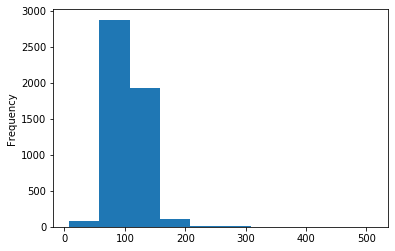

In [18]:
df['duration'].plot(kind = 'hist',bins = 10)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

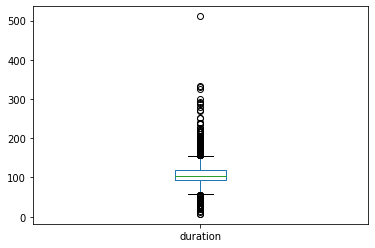

In [29]:
df['duration'].plot(kind = 'box')

In [40]:
df2 = df[['content_rating','movie_title']].groupby('content_rating')['movie_title'].count().rename("title_count").reset_index()

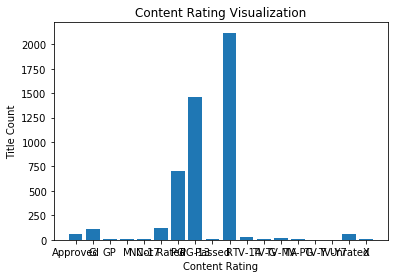

In [42]:
plt.bar(df2['content_rating'],df2['title_count'])
plt.xlabel('Content Rating')
plt.ylabel('Title Count')
plt.title('Content Rating Visualization')
plt.show()

In [43]:
df.sort_values('imdb_score', ascending=False).groupby('genres')['movie_title','imdb_score'].first()

,movie_title,imdb_score
genres,,
Action,Kickboxer: Vengeance,9.1
Action|Adventure,Raiders of the Lost Ark,8.5
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,Osmosis Jones,6.2
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,Alpha and Omega 4: The Legend of the Saw Tooth...,6.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,The Iron Giant,8.0
...,...,...
Sci-Fi|Thriller,Blade Runner,8.2
Thriller,Frenzy,7.5
Thriller|War,The Train,7.9


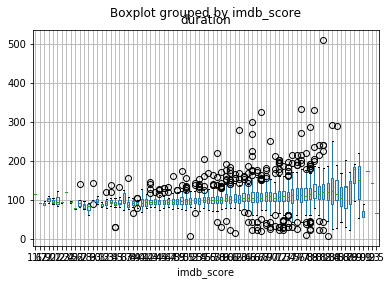

In [44]:
df.boxplot(column='duration', by='imdb_score');

In [46]:
len(df_i)

7957

In [45]:
df = df_i

In [46]:
df['length'] = df['wordsInTitle'].str.len()
df['length'].corr(df['imdbRating'])

0.08861761501785742

In [47]:
df['Quantile'],bin_edges=pd.qcut(df['length'],q=[0, .25, .5, .75,1],labels=False,retbins=True)
df2 = pd.crosstab(df.year,df.Quantile).rename(columns={0:" num_videos_less_than25Percentile",1:" num_videos_25_50Percentile",2:"num_videos_50_75Percentile",3:"num_videos_greaterthan75Precentile"})
df2['min_length'] = df.groupby(["year"])["length"].min()
df2['max_length'] = df.groupby(["year"])["length"].max()
df2

Quantile,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile,min_length,max_length
year,,,,,,
1893.0,0,1,0,0,16.0,16.0
1899.0,0,1,0,0,22.0,22.0
1903.0,0,0,1,0,23.0,23.0
1911.0,0,2,0,0,15.0,21.0
1913.0,0,2,1,0,18.0,33.0
...,...,...,...,...,...,...
2012.0,60,36,53,104,3.0,100.0
2013.0,68,37,54,112,3.0,89.0
2014.0,8,10,9,34,4.0,99.0


In [48]:
bin_edges

array([  1.,  14.,  22.,  34., 126.])

In [44]:
df['length'].describe()

count    7950.000000
mean       25.554214
std        16.021899
min         1.000000
25%        14.000000
50%        22.000000
75%        34.000000
max       126.000000
Name: length, dtype: float64

In [39]:
df['Quantile'].value_counts()

0.0    2192
3.0    1947
2.0    1906
1.0    1905
Name: Quantile, dtype: int64

In [75]:
df = df_d

In [80]:
vol = []
for i in range(len(df)):
    if(df['depth'][i] > 60):
        if(df['z'][i] == 'None'):
            vol.append(np.nan)
        else:
            vol.append(float(df['x'][i])*float(df['y'][i])*float(df['z'][i]))
    else:
        vol.append(8)
df['volume'] = vol
df['bins'] = pd.qcut(df['volume'],4,labels = False)
df2 = pd.crosstab(df.bins,df.cut).apply(lambda r: r/r.sum(), axis=1)

In [82]:
df2

cut,Fair,Good,Ideal,Premium,Very Good
bins,,,,,
0.0,0.021357,0.108268,0.329106,0.290100,0.251168
1.0,0.011496,0.065787,0.546243,0.203664,0.172810
2.0,0.056062,0.125028,0.333259,0.216685,0.268966
3.0,0.030481,0.064669,0.389499,0.312296,0.203055


In [84]:
df['bins'].value_counts()

0.0    13486
2.0    13485
3.0    13484
1.0    13483
Name: bins, dtype: int64

In [89]:
df2.loc[2]

cut
Fair         0.056062
Good         0.125028
Ideal        0.333259
Premium      0.216685
Very Good    0.268966
Name: 2.0, dtype: float64

In [67]:
df = df_m

In [69]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [102]:
a = 0.1
gr = df.sort_values('gross',ascending=False).apply(lambda x : x.head(int(len(x) * a))).reset_index(drop = True)

In [103]:
gr

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
2,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
3,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
4,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Color,Robert Rodriguez,93.0,84.0,0.0,2000.0,Salma Hayek,13000.0,111760631.0,Action|Adventure|Comedy|Family|Sci-Fi,...,188.0,English,USA,PG,38000000.0,2003.0,4000.0,4.1,1.85,681
500,Color,David Lean,89.0,200.0,767.0,382.0,Klaus Kinski,597.0,111722000.0,Drama|Romance|War,...,255.0,English,USA,PG-13,11000000.0,1965.0,396.0,8.0,2.35,7000
501,Color,Tony Scott,81.0,140.0,12000.0,619.0,Jake Busey,10000.0,111544445.0,Action|Crime|Drama|Mystery|Thriller,...,415.0,English,USA,R,90000000.0,1998.0,660.0,7.3,2.35,0
502,Color,Rob Minkoff,196.0,92.0,50.0,517.0,Zach Callison,3000.0,111505642.0,Adventure|Animation|Comedy|Family|Sci-Fi,...,130.0,English,USA,PG,145000000.0,2014.0,1000.0,6.9,1.85,11000


In [104]:
gr2 = gr.groupby('title_year')['imdb_score'].mean().rename('Avg_Imdb').reset_index()


In [105]:
gr

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
2,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
3,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
4,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Color,Robert Rodriguez,93.0,84.0,0.0,2000.0,Salma Hayek,13000.0,111760631.0,Action|Adventure|Comedy|Family|Sci-Fi,...,188.0,English,USA,PG,38000000.0,2003.0,4000.0,4.1,1.85,681
500,Color,David Lean,89.0,200.0,767.0,382.0,Klaus Kinski,597.0,111722000.0,Drama|Romance|War,...,255.0,English,USA,PG-13,11000000.0,1965.0,396.0,8.0,2.35,7000
501,Color,Tony Scott,81.0,140.0,12000.0,619.0,Jake Busey,10000.0,111544445.0,Action|Crime|Drama|Mystery|Thriller,...,415.0,English,USA,R,90000000.0,1998.0,660.0,7.3,2.35,0
502,Color,Rob Minkoff,196.0,92.0,50.0,517.0,Zach Callison,3000.0,111505642.0,Adventure|Animation|Comedy|Family|Sci-Fi,...,130.0,English,USA,PG,145000000.0,2014.0,1000.0,6.9,1.85,11000


In [223]:
import itertools

In [224]:
df = df_m

In [226]:
individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [71]:
df = df_i

In [72]:
df['Genre_combo'] = df.loc[:,'Action':'Western'].T.apply(lambda x : "|".join(x.index[x==1]),axis=0)
df=df.groupby(["type","year","Genre_combo"]).agg(avg_rating = ("imdbRating","mean"),
                                                  min_rating = ("imdbRating","min"),
                                                  max_rating = ("imdbRating","max"),
                                                  total_run_time_mins = ("duration",np.sum))

In [74]:
df

avg_rating  min_rating  max_rating  \
type     year   Genre_combo                                                    
game     1987.0                                 6.80         6.8         6.8   
                Action|Adventure                6.60         6.6         6.6   
                Action|Adventure|Fantasy        7.30         7.3         7.3   
         1988.0                                  NaN         NaN         NaN   
         1989.0 Action                          8.20         8.2         8.2   
...                                              ...         ...         ...   
video.tv 2013.0 Comedy                          8.00         8.0         8.0   
                Documentary|TalkShow            8.30         8.3         8.3   
                TalkShow                         NaN         NaN         NaN   
         2014.0                                 7.25         6.7         7.8   
                RealityTV                       7.20         7.2         7.2   

                                          total_run_time_mins  
type     year   Genre_combo                                    
game     1987.0                                           0.0  
                Action|Adventure                          0.0  
                Action|Adventure|Fantasy                  0.0  
         1988.0                                           0.0  
         1989.0 Action                                    0.0  
...                                                       ...  
video.tv 2013.0 Comedy                                 3600.0  
                Documentary|TalkShow                    600.0  
                TalkShow                                  0.0  
         2014.0                                       12840.0  
                RealityTV                                 0.0  

[4689 rows x 4 columns]

In [53]:
df = df_s

In [69]:
# Q1 Find least sales amount for each item
# has been solved as an example
def least_sales(df):
	ls = df.groupby(["Item"])["Sale_amt"].min().reset_index()
	return ls

# Q2 compute total sales at each year X region
def sales_year_region(df):
	df['year'] = df['OrderDate'].dt.year
	syr = df.groupby(['year','Region'])['Sale_amt'].sum().reset_index()
	return syr

# Q3 append column with no of days difference from present date to each order date
from datetime import datetime
def days_diff(df,ref_date):
	df['days_diff'] = pd.to_datetime(datetime.strptime(ref_date,'%d/%m/%Y').date()) - df['OrderDate']
	return df

# Q4 get dataframe with manager as first column and  salesman under them as lists in rows in second column.
def mgr_slsmn(df):
	ms = df.groupby('Manager')['SalesMan'].apply(lambda x: ','.join(set(x.dropna()))).rename('list_of_salesman').reset_index()
	return ms

# Q5 For all regions find number of salesman and number of units
def slsmn_units(df):
	df1 = df.groupby(['Region'])['SalesMan'].count().rename('salesmen_count')
	df2 = df.groupby(['Region'])['Sale_amt'].sum().rename('total_sales')
	ls = pd.concat([df1,df2],axis=1)
	return ls

# Q6 Find total sales as percentage for each manager
def sales_pct(df):
	total_sales = df.groupby(['Manager'])['Sale_amt'].sum().rename('total_sales')
	sum1 = total_sales.sum()
	ps = total_sales.apply(lambda x: x/sum1).rename('percent_sales').reset_index()
	return ps

# Q7 get imdb rating for fifth movie of dataframe
def fifth_movie(df):
	ls = df.loc[4,'imdbRating']
	return ls

# Q8 return titles of movies with shortest and longest run time
def movies(df):
	title = []
	title.append(df[df['duration'] == df['duration'].max()]['movie_title'].values)
	title.append(df[df['duration'] == df['duration'].min()]['movie_title'].values)
	return title

# Q9 sort by two columns - release_date (earliest) and Imdb rating(highest to lowest)
def sort_df(df):
	ls = df.sort_values(['year', 'imdbRating'], ascending=[True, False])
	return ls

# Q10 subset revenue more than 2 million and spent less than 1 million & duration between 30 mintues to 180 minutes
def subset_df(df):
	ls = df[(df['gross'] > 2000000) & (df['budget'] < 1000000) & (df['duration'] >= 30) & (df['duration'] <= 180)]
	return ls

# Q11 count the duplicate rows of diamonds DataFrame.
def dupl_rows(df):
	ls = df.duplicated().sum()
	return ls

# Q12 droping those rows where any value in a row is missing in carat and cut columns
def drop_row(df):
	ls = df.dropna(subset=['carat','cut'],how='any')
	return ls

# Q13 subset only numeric columns
def sub_numeric(df):
	ls = df.select_dtypes(include=np.number)
	return ls

# Q14 compute volume as (x*y*z) when depth > 60 else 8
def f(row):
    if row['depth'] > 60:
        return float(row['x']) * float(row['y']) * float(row['z'])
    else:
        return 8
def volume(df):
	df['volume'] = df.apply(f,axis=1)
	return df['volume']

# Q15 impute missing price values with mean
def impute(df):
	#df['price'].fillna(value=df['price'].mean(),inplace = True) //for change in dataframe
	ls = df['price'].fillna(value=df['price'].mean())
	return ls

#print(least_sales(df_s))
#print(sales_year_region(df_s))
#print(days_diff(df_s))
#print(mgr_slsmn(df_s))
#print(slsmn_units(df_s))
#print(sales_pct(df_s))
#print(fifth_movie(df_i))
#print(movies(df_i))
#print(sort_df(df_i))
#print(subset_df(df_i))
#print(dupl_rows(df_d))
#print(drop_row(df_d))
#print(sub_numeric(df_d))
#print(volume(df_d))
#print(impute(df_d))

In [70]:
days_diff(df,"20/02/2020")

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,days_diff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,775 days
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,758 days
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,741 days
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,724 days
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,707 days
5,2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0,690 days
6,2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0,673 days
7,2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0,656 days
8,2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0,639 days
9,2018-06-08,East,Martha,Alexander,Home Theater,60,500.0,30000.0,622 days


In [66]:
ref = "20/02/2020"
datetime.strptime(ref,"%d/%m/%Y").date()

datetime.date(2020, 2, 20)

In [192]:
df = df_m

In [194]:
df['title_year'].unique()

array([2009., 2007., 2015., 2012.,   nan, 2010., 2016., 2006., 2008.,
       2013., 2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003.,
       2001., 2002., 1998., 2000., 1990., 1991., 1994., 1996., 1982.,
       1993., 1979., 1992., 1989., 1984., 1988., 1978., 1962., 1980.,
       1972., 1981., 1968., 1985., 1940., 1963., 1987., 1986., 1973.,
       1983., 1976., 1977., 1970., 1971., 1969., 1960., 1965., 1964.,
       1927., 1974., 1937., 1975., 1967., 1951., 1961., 1946., 1953.,
       1954., 1959., 1932., 1947., 1956., 1945., 1952., 1930., 1966.,
       1939., 1950., 1948., 1958., 1957., 1943., 1944., 1938., 1949.,
       1936., 1941., 1955., 1942., 1929., 1935., 1933., 1916., 1934.,
       1925., 1920.])

In [203]:
df = df_i

In [212]:
df1 = res['title_year'].reset_index()

In [213]:
df2 = df.loc[:,'Action':'Western'].reset_index()

In [214]:
df3 = pd.merge(df1,df2)
df3 = df3.drop(['index'], axis = 1)
df3 = df3.T
df3.columns = df3.iloc[0]
df3 = df3.drop(['title_year'],axis=0)
df3 = df3.T
df3

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1916.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1927.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [215]:
y_sum = df3.groupby('title_year').sum()
y_sum

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1916.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1927.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [221]:
pd.merge(res,y_sum,on='title_year')

,title_year,Avg_Imdb,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,1916.0,8.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1920.0,4.800000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1925.0,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1927.0,8.300000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1929.0,6.300000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2012.0,7.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,2013.0,7.104167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,2014.0,7.103846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,2015.0,6.969565,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df = df_i

In [228]:
df['Genre_combo'] = df.loc[:,'Action':'Western'].T.apply(lambda x : "|".join(x.index[x==1]),axis=0)

In [229]:
df['bins'] = pd.qcut(df['duration'],10,labels = False)
df2 = df.groupby(['bins']).agg(total_nominations = ("nrOfNominations","sum"),
                               total_wins = ("nrOfWins","sum"))
df2['total_count'] = df.groupby(['bins'])['year'].count()

In [50]:
df = df_i

In [51]:
df['bins'] = pd.qcut(df['duration'],10,labels = False)
df2 = df.groupby(['bins']).agg(total_nominations = ("nrOfNominations","sum"),
                               total_wins = ("nrOfWins","sum"))
df2['total_count'] = df.groupby(['bins'])['year'].count()

In [52]:
tg=(df.groupby("bins")[df.loc[:,'Action':'Western'].columns.tolist()].sum()).T

In [53]:
tg

bins,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Action,119,96,142,226,181,218,273,277,268,281
Adult,0,0,6,9,2,0,0,1,1,2
Adventure,115,65,190,229,157,169,195,187,203,207
Animation,469,24,155,122,48,36,35,19,18,10
Biography,13,27,34,45,31,36,60,89,126,145
Comedy,1165,161,479,736,517,526,530,428,279,224
Crime,42,116,216,250,201,225,248,274,238,160
Documentary,239,177,172,147,70,59,40,25,50,78
Drama,196,312,444,565,472,573,728,815,889,943
Family,317,20,105,143,91,84,85,57,38,69


In [54]:
tg_count = pd.DataFrame(tg.apply(lambda a: a.nlargest(3).index,axis=0).transpose(),)

In [55]:
tg_count.columns = ["First","Second","Third"]

In [56]:
df2['Top 3 Genres'] = tg_count["First"] + "," + tg_count["Second"] + "," + tg_count["Third"]

In [57]:
df2

,total_nominations,total_wins,total_count,Top 3 Genres
bins,,,,
0.0,7928,3349,2080,"Comedy,Short,Animation"
1.0,4923,1912,675,"Drama,Documentary,Comedy"
2.0,8946,3730,1368,"Comedy,Drama,TalkShow"
3.0,3128,2740,1740,"Comedy,Drama,Horror"
4.0,3109,2511,1212,"Comedy,Drama,Crime"
5.0,3981,3253,1275,"Drama,Comedy,Crime"
6.0,5713,4632,1387,"Drama,Comedy,Action"
7.0,6470,5473,1346,"Drama,Comedy,Action"
8.0,9667,7999,1325,"Drama,Comedy,Action"


In [60]:
df = df_m
import math
year = df['title_year'].unique()
df['url'] = df['movie_imdb_link'].apply(lambda x: x.split('?')[0])

In [62]:
b4 = pd.DataFrame()
a = 0.1
for i in year:
    new = df[df['title_year'] == i]
    gr = new.sort_values('gross',ascending=False).apply(lambda x : x.head(math.ceil(len(x) * a)))
    b4 = b4.append(gr)
new = pd.merge(b4,df_i,on = 'url',how='left')
new

,color,director_name,num_critic_for_reviews,duration_x,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Short,Sport,TalkShow,Thriller,War,Western,Genre_combo,length,Quantile,bins
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0.0,0.0,0.0,0.0,0.0,0.0,Action|Adventure|Fantasy,28.0,2.0,9.0
1,Color,Michael Bay,366.0,150.0,0.0,464.0,Kevin Dunn,894.0,402076689.0,Action|Adventure|Sci-Fi,...,0.0,0.0,0.0,0.0,0.0,0.0,Action|Adventure|SciFi,22.0,1.0,9.0
2,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,0.0,0.0,0.0,0.0,0.0,0.0,Adventure|Family|Fantasy,34.0,3.0,9.0
3,Color,Chris Weitz,299.0,130.0,129.0,12000.0,Kristen Stewart,21000.0,296623634.0,Adventure|Drama|Fantasy|Romance,...,0.0,0.0,0.0,0.0,0.0,0.0,Adventure|Drama|Fantasy,31.0,2.0,8.0
4,Color,Pete Docter,408.0,96.0,0.0,262.0,Delroy Lindo,1000.0,292979556.0,Adventure|Animation|Comedy|Family,...,0.0,0.0,0.0,0.0,0.0,0.0,Adventure|Animation|Drama,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Black and White,Lloyd Bacon,65.0,89.0,24.0,45.0,Dick Powell,610.0,2300000.0,Comedy|Musical|Romance,...,0.0,0.0,0.0,0.0,0.0,0.0,Comedy|Musical|Romance,10.0,0.0,3.0
540,Black and White,D.W. Griffith,69.0,123.0,204.0,9.0,Mae Marsh,436.0,NaN,Drama|History|War,...,0.0,0.0,0.0,0.0,0.0,0.0,Drama|History,11.0,0.0,9.0
541,Black and White,Frank Capra,124.0,65.0,964.0,21.0,Alan Hale,380.0,NaN,Comedy|Romance,...,0.0,0.0,0.0,0.0,0.0,0.0,Comedy|Romance,25.0,2.0,6.0
542,Black and White,King Vidor,48.0,151.0,54.0,6.0,Renée Adorée,81.0,NaN,Drama|Romance|War,...,0.0,0.0,0.0,0.0,1.0,0.0,Drama|Romance|War,20.0,1.0,9.0


In [63]:
genres = new.loc[:,'Action':'Western'].columns.tolist()

In [64]:
res = new.groupby('title_year')[genres].sum()
res['Avg_Imdb'] = new.groupby('title_year')['imdb_score'].mean()

In [65]:
cols = res.columns.tolist()

In [66]:
cols

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'FilmNoir',
 'GameShow',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'RealityTV',
 'Romance',
 'SciFi',
 'Short',
 'Sport',
 'TalkShow',
 'Thriller',
 'War',
 'Western',
 'Avg_Imdb']

In [68]:
cols = cols[-1:] + cols[:-1]
res = res[cols]
res

,Western,Avg_Imdb,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War
title_year,,,,,,,,,,,,,,,,,,,,,
1916.0,0.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920.0,0.0,4.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925.0,0.0,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1927.0,0.0,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1929.0,0.0,6.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012.0,1.0,7.217391,9.0,0.0,13.0,4.0,1.0,7.0,3.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0
2013.0,0.0,7.104167,8.0,0.0,13.0,3.0,1.0,7.0,4.0,0.0,...,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,3.0,0.0
2014.0,0.0,7.103846,6.0,0.0,8.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df = df_i
df['Genre_combo'] = df.loc[:,'Action':'Western'].T.apply(lambda x : "|".join(x.index[x==1]),axis=0)
df=df.groupby(["type","year","Genre_combo"]).agg(avg_rating = ("imdbRating","mean"),
                                                  min_rating = ("imdbRating","min"),
                                                  max_rating = ("imdbRating","max"),
                                                  total_run_time_mins = ("duration",np.sum)).reset_index()
df

,type,year,Genre_combo,avg_rating,min_rating,max_rating,total_run_time_mins
0,game,1972.0,Sport,7.8,7.8,7.8,0.0
1,game,1980.0,Action,6.1,6.1,6.1,0.0
2,game,1980.0,Action|Family,7.7,7.7,7.7,0.0
3,game,1981.0,Action|SciFi,7.6,7.6,7.6,0.0
4,game,1982.0,Animation|Family,7.3,7.3,7.3,0.0
...,...,...,...,...,...,...,...
7850,video.tv,2014.0,Drama|SciFi,7.7,7.7,7.7,3300.0
7851,video.tv,2014.0,GameShow,NaN,NaN,NaN,0.0
7852,video.tv,2014.0,RealityTV,7.2,7.2,7.2,0.0
7853,video.tv,2014.0,SciFi|Thriller,7.1,7.1,7.1,2400.0


In [19]:
df = df_i
df['length'] = df['wordsInTitle'].str.len()
df['Quantile'],bins =pd.qcut(df['length'],q=[0, .25, .5, .75,1], labels=False,retbins = True)
df2 = pd.crosstab(df.year,df.Quantile).rename(columns={0:" num_videos_less_than25Percentile",1:" num_videos_25_50Percentile",2:"num_videos_50_75Percentile",3:"num_videos_greaterthan75Precentile"})
df2['min_length'] = df.groupby(["year"])["length"].min()
df2['max_length'] = df.groupby(["year"])["length"].max()

In [20]:
df2

Quantile,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile,min_length,max_length
year,,,,,,
1888.0,0,1,1,0,21.0,29.0
1890.0,0,1,0,0,15.0,15.0
1893.0,0,1,0,0,16.0,16.0
1894.0,0,0,1,0,31.0,31.0
1899.0,0,1,0,0,22.0,22.0
...,...,...,...,...,...,...
2013.0,113,70,87,220,3.0,89.0
2014.0,22,30,18,59,4.0,99.0
2015.0,4,1,1,2,6.0,37.0


In [21]:
bins

array([  1.,  14.,  22.,  32., 137.])

In [22]:
df['length'].describe()

count    14748.000000
mean        24.886629
std         14.994415
min          1.000000
25%         14.000000
50%         22.000000
75%         32.000000
max        137.000000
Name: length, dtype: float64

In [72]:
df = df_d
vol = []
for i in range(len(df)):
    if(df['depth'][i] > 60):
        if(df['z'][i] == 'None'):
            vol.append(np.nan)
        else:
            vol.append(float(df['x'][i])*float(df['y'][i])*float(df['z'][i]))
    else:
        vol.append(8)
df['volume'] = vol
df['bins'] = pd.qcut(df['volume'],5,labels = False)
df2 = pd.crosstab(df.bins,df.cut,normalize=True,margins=True)*100

In [73]:
df['bins'].value_counts()

4.0    10788
2.0    10788
0.0    10788
3.0    10787
1.0    10787
Name: bins, dtype: int64

In [74]:
df2

cut,Fair,Good,Ideal,Premium,Very Good,All
bins,,,,,,
0.0,0.524686,2.480672,5.156015,6.222074,5.615811,19.999258
1.0,0.088993,1.116117,11.387359,4.371767,3.035022,19.999258
2.0,0.617387,1.614847,9.703914,3.609767,4.455198,20.001112
3.0,1.051226,2.488088,6.331461,4.927972,5.200512,19.999258
4.0,0.702672,1.394219,7.373417,6.437140,4.093665,20.001112
All,2.984964,9.093943,39.952166,25.568719,22.400208,100.000000


In [46]:
df2.iloc[4].sum()

0.9999999999999999

In [ ]:
df = df_i
df['bins'] = pd.qcut(df['duration'],10,labels = False)
df2 = df.groupby(['bins']).agg(total_nominations = ("nrOfNominations","sum"),
                               total_wins = ("nrOfWins","sum"))
df2['total_count'] = df.groupby(['bins'])['year'].count()
tg = (df.groupby("bins")[df.loc[:,'Action':'Western'].columns.tolist()].sum()).T
tg_count = pd.DataFrame(tg.apply(lambda a: a.nlargest(3).index,axis=0).transpose(),)
tg_count.columns = ["First","Second","Third"]
df2['Top 3 Genres'] = tg_count["First"] + "," + tg_count["Second"] + "," + tg_count["Third"]